In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_resnet50_unet(input_shape, num_classes=3):
    inputs = Input(input_shape)
    resnet50 = ResNet50(include_top=False, weights='imagenet', input_tensor=inputs)
    s1 = resnet50.get_layer("input_1").output
    s2 = resnet50.get_layer("conv1_relu").output
    s3 = resnet50.get_layer("conv2_block3_out").output
    s4 = resnet50.get_layer("conv3_block4_out").output
    b1 = resnet50.get_layer("conv4_block6_out").output

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)
    outputs = Conv2D(num_classes, 1, padding="same", activation="softmax")(d4)

    model = Model(inputs, outputs, name="ResNet50_U-Net")
    return model

# Data Augmentation configuration
data_gen_args = {
    "rotation_range": 10,
    "width_shift_range": 0.1,
    "height_shift_range": 0.1,
    "shear_range": 0.1,
    "zoom_range": 0.1,
    "horizontal_flip": True,
    "fill_mode": 'nearest'
}

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Directories
#train_image_dir = 'path/to/train/images'
#train_mask_dir = 'path/to/train/masks'
#val_image_dir = 'path/to/val/images'
#val_mask_dir = 'path/to/val/masks'
train_image_dir = '/Users/arahjou/Downloads/dataset_UWM_GI_Tract_train_valid/train/images/*.png'
train_mask_dir = '/Users/arahjou/Downloads/dataset_UWM_GI_Tract_train_valid/train/masks/*.png'
val_image_dir = '/Users/arahjou/Downloads/dataset_UWM_GI_Tract_train_valid/valid/images/*.png'
val_mask_dir = '/Users/arahjou/Downloads/dataset_UWM_GI_Tract_train_valid/valid/masks/*.png'

# Generators
train_image_generator = image_datagen.flow_from_directory(
    train_image_dir,
    class_mode=None,
    color_mode='rgb',
    target_size=(288, 288),
    batch_size=32,
    seed=42
)

train_mask_generator = mask_datagen.flow_from_directory(
    train_mask_dir,
    class_mode=None,
    color_mode='grayscale',
    target_size=(288, 288),
    batch_size=32,
    seed=42
)

val_image_generator = image_datagen.flow_from_directory(
    val_image_dir,
    class_mode=None,
    color_mode='rgb',
    target_size=(288, 288),
    batch_size=32,
    seed=42
)

val_mask_generator = mask_datagen.flow_from_directory(
    val_mask_dir,
    class_mode=None,
    color_mode='grayscale',
    target_size=(288, 288),
    batch_size=32,
    seed=42
)

# Combine generators
train_generator = zip(train_image_generator, train_mask_generator)
val_generator = zip(val_image_generator, val_mask_generator)

# Model
model = build_resnet50_unet((288, 288, 3), num_classes=3)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=100,
    validation_steps=50,
    epochs=20
)


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_resnet50_unet(input_shape, num_classes=3):
    inputs = Input(input_shape)
    resnet50 = ResNet50(include_top=False, weights='imagenet', input_tensor=inputs)
    s1 = resnet50.get_layer("input_1").output
    s2 = resnet50.get_layer("conv1_relu").output
    s3 = resnet50.get_layer("conv2_block3_out").output
    s4 = resnet50.get_layer("conv3_block4_out").output
    b1 = resnet50.get_layer("conv4_block6_out").output

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)
    outputs = Conv2D(num_classes, 1, padding="same", activation="softmax")(d4)

    model = Model(inputs, outputs, name="ResNet50_U-Net")
    return model

# Data Augmentation configuration
data_gen_args = {
    "rotation_range": 10,
    "width_shift_range": 0.1,
    "height_shift_range": 0.1,
    "shear_range": 0.1,
    "zoom_range": 0.1,
    "horizontal_flip": True,
    "fill_mode": 'nearest'
}

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Corrected Directory Paths
#train_image_dir = '/path/to/train/images'
#train_mask_dir = '/path/to/train/masks'
#val_image_dir = '/path/to/val/images'
#val_mask_dir = '/path/to/val/masks'
train_image_dir = '/Users/arahjou/Downloads/dataset_UWM_GI_Tract_train_valid/train/images/*.png'
train_mask_dir = '/Users/arahjou/Downloads/dataset_UWM_GI_Tract_train_valid/train/masks/*.png'
val_image_dir = '/Users/arahjou/Downloads/dataset_UWM_GI_Tract_train_valid/valid/images/*.png'
val_mask_dir = '/Users/arahjou/Downloads/dataset_UWM_GI_Tract_train_valid/valid/masks/*.png'

# Generators
train_image_generator = image_datagen.flow_from_directory(
    train_image_dir,
    class_mode=None,
    color_mode='rgb',
    target_size=(288, 288),
    batch_size=32,
    seed=42
)

train_mask_generator = mask_datagen.flow_from_directory(
    train_mask_dir,
    class_mode=None,
    color_mode='grayscale',
    target_size=(288, 288),
    batch_size=32,
    seed=42
)

val_image_generator = image_datagen.flow_from_directory(
    val_image_dir,
    class_mode=None,
    color_mode='rgb',
    target_size=(288, 288),
    batch_size=32,
    seed=42
)

val_mask_generator = mask_datagen.flow_from_directory(
    val_mask_dir,
    class_mode=None,
    color_mode='grayscale',
    target_size=(288, 288),
    batch_size=32,
    seed=42
)

# Combine generators
train_generator = zip(train_image_generator, train_mask_generator)
val_generator = zip(val_image_generator, val_mask_generator)

# Model
model = build_resnet50_unet((288, 288, 3), num_classes=3)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=100,
    validation_steps=50,
    epochs=20
)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/arahjou/Downloads/dataset_UWM_GI_Tract_train_valid/train/images/*.png'

In [ ]:
#!python -m pip install tensorflow

In [ ]:
#!python -m pip install tensorflow-macos

In [ ]:
#!python -m pip install tensorflow-metal

In [ ]:
https://idiotdeveloper.com/step-by-step-guide-to-resnet50-unet-in-tensorflow/

### Code for training

In [3]:
# Step 1: Revised Class Definitions and Mappings

import glob
import os
import numpy as np
import tensorflow as tf
import cv2

# Configuration for dataset classes
class DatasetConfig:
    NUM_CLASSES = 4  # Include background + 3 types of bowel segments
    id2color = {
        0: (0, 0, 0),    # Background pixel
        1: (0, 0, 255),  # Stomach
        2: (0, 255, 0),  # Small Bowel
        3: (255, 0, 0),  # Large Bowel
    }
    # Reverse id2color mapping for converting RGB mask to grayscale
    rev_id2color = {value: key for key, value in id2color.items()}

# Step 2: Update Mask Loading Function

def load_image_and_mask(image_path, mask_path):
    def _load_image_and_mask(image_path, mask_path):
        # Decode the image and mask using TensorFlow operations
        image = tf.io.read_file(image_path)
        image = tf.image.decode_png(image, channels=3)  # Assuming PNG, adjust if different

        mask = tf.io.read_file(mask_path)
        mask = tf.image.decode_png(mask, channels=1)  # Assuming PNG and mask is grayscale

        # Ensure resizing works correctly by explicitly defining the size as a tuple
        image = tf.image.resize(image, [128, 128])
        mask = tf.image.resize(mask, [128, 128], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

        image = tf.cast(image, tf.float32) / 255.0
        mask = tf.cast(mask, tf.uint8)

        # Squeeze and check dimensions before one-hot encoding
        mask = tf.squeeze(mask, axis=-1)  # Remove the channel dimension if it is size 1
        if mask.shape.ndims != 2:
            raise ValueError("Mask must be 2D after squeezing the channel dimension.")

        mask = tf.one_hot(mask, depth=DatasetConfig.NUM_CLASSES)

        return image, mask

    # Apply the inner function using tf.py_function
    [image, mask] = tf.py_function(_load_image_and_mask, [image_path, mask_path], [tf.float32, tf.float32])
    image.set_shape((128, 128, 3))
    mask.set_shape((128, 128, DatasetConfig.NUM_CLASSES))
    return image, mask




# Step 3:

def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])
    x = inputs

    # Downsampling
    x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D()(x)

    # Upsampling
    x = tf.keras.layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same')(x)

    # Output layer should match the input dimensions
    last = tf.keras.layers.Conv2D(output_channels, 3, activation=None, padding='same')  # No stride necessary here

    x = last(x)
    return tf.keras.Model(inputs=inputs, outputs=x)

# Re-initialize the model with the corrected architecture
model = unet_model(DatasetConfig.NUM_CLASSES)


# step4:


# Define the paths to your images and labels
#train_image_paths = glob.glob('/Users/arahjou/Downloads/Medical_seg/mmseg_train/images/*.png')
#train_label_paths = glob.glob('/Users/arahjou/Downloads/Medical_seg/mmseg_train/labels/*.png')
#val_image_paths = glob.glob('/Users/arahjou/Downloads/Medical_seg/mmseg_val/images/*.png')
#val_label_paths = glob.glob('/Users/arahjou/Downloads/Medical_seg/mmseg_val/labels/*.png')


train_image_paths = glob.glob('/Users/arahjou/Downloads/dataset_UWM_GI_Tract_train_valid/train/images/*.png')
train_label_paths = glob.glob('/Users/arahjou/Downloads/dataset_UWM_GI_Tract_train_valid/train/masks/*.png')
val_image_paths = glob.glob('/Users/arahjou/Downloads/dataset_UWM_GI_Tract_train_valid/valid/images/*.png')
val_label_paths = glob.glob('/Users/arahjou/Downloads/dataset_UWM_GI_Tract_train_valid/valid/masks/*.png')

# Ensure the lists are sorted so they are aligned
train_image_paths.sort()
train_label_paths.sort()
val_image_paths.sort()
val_label_paths.sort()


def augment(image, mask):
    # Random flip (horizontal)
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        mask = tf.image.flip_left_right(mask)

    # Random flip (vertical)
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_up_down(image)
        mask = tf.image.flip_up_down(mask)

    # Random rotation
    k = tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    image = tf.image.rot90(image, k)
    mask = tf.image.rot90(mask, k)

    # Random brightness
    image = tf.image.random_brightness(image, max_delta=0.1)

    return image, mask


# ##########
def image_mask_generator(image_paths, label_paths, batch_size, augment_fn=None):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, label_paths))
    dataset = dataset.map(load_image_and_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if augment_fn:
        dataset = dataset.map(augment_fn, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset



# Create the TensorFlow datasets
# Use augmentation only in the training dataset
train_dataset = image_mask_generator(train_image_paths, train_label_paths, batch_size=16, augment_fn=augment)
val_dataset = image_mask_generator(val_image_paths, val_label_paths, batch_size=16)



# Step 4: Compile and Train the Model (consider adding these improvements)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping

# Setup EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',    # Monitor the validation loss
    patience=5,            # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the lowest validation loss
)

# Modify the model training call to include early stopping
model_history = model.fit(
    train_dataset,
    epochs=3,
    validation_data=val_dataset,
    callbacks=[early_stopping_monitor]
)


Epoch 1/3
828/828 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.9521 - loss: 0.3125 - val_accuracy: 0.9604 - val_loss: 0.1872
Epoch 2/3
828/828 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.9578 - loss: 0.1880 - val_accuracy: 0.9604 - val_loss: 0.1687
Epoch 3/3
828/828 ━━━━━━━━━━━━━━━━━━━━ 47s 57ms/step - accuracy: 0.9578 - loss: 0.1725 - val_accuracy: 0.9604 - val_loss: 0.1617


### Code for prediction

3352/3352 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7m

2024-05-10 10:30:26.071974: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Mean IoU: [0.96038365 0.48717186 0.326969   0.15304297]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


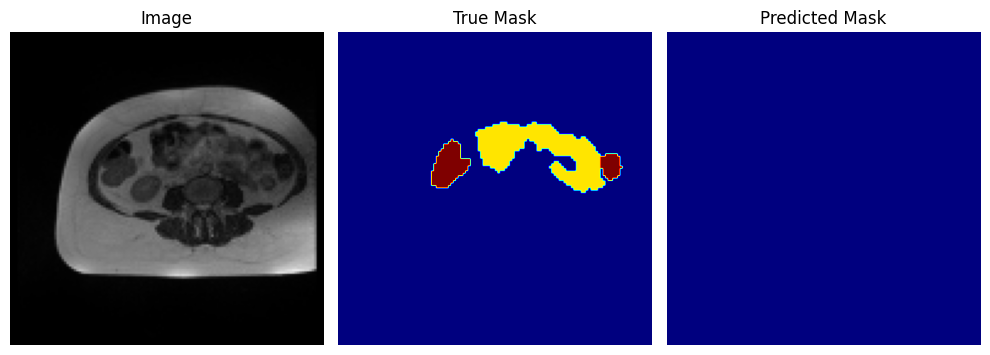

2024-05-10 10:30:26.774251: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:

#test_image_paths = glob.glob('/Users/arahjou/Downloads/Medical_seg/mmseg_test/images/*.png')
#test_label_paths = glob.glob('/Users/arahjou/Downloads/Medical_seg/mmseg_test/labels/*.png')

test_image_paths = glob.glob('/Users/arahjou/Downloads/dataset_UWM_GI_Tract_train_valid/valid/images/*.png')
test_label_paths = glob.glob('/Users/arahjou/Downloads/dataset_UWM_GI_Tract_train_valid/valid/masks/*.png')


# Load the test dataset without augmentation
test_dataset = image_mask_generator(test_image_paths, test_label_paths, batch_size=1)  # Batch size of 1 for inference
# Predict masks on the test dataset
predicted_masks = model.predict(test_dataset)
# Function to calculate IoU for each class
def calculate_iou(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2])
    union = tf.reduce_sum(y_true + y_pred, axis=[1, 2]) - intersection
    return tf.reduce_mean((intersection + 1e-10) / (union + 1e-10), axis=0)

# Calculate IoU for each class
ious = []
for images, masks in test_dataset:
    preds = model.predict(images)
    preds = tf.argmax(preds, axis=-1)
    preds = tf.one_hot(preds, depth=DatasetConfig.NUM_CLASSES)
    iou = calculate_iou(tf.cast(masks, tf.float32), preds)
    ious.append(iou)

mean_iou = tf.reduce_mean(ious, axis=0)
print("Mean IoU:", mean_iou.numpy())

import matplotlib.pyplot as plt

def plot_predictions(images, true_masks, predicted_masks, num=3):
    plt.figure(figsize=(10, 5 * num))
    for i in range(num):
        plt.subplot(num, 3, 3*i+1)
        plt.imshow(images[i])
        plt.title('Image')
        plt.axis('off')
        
        plt.subplot(num, 3, 3*i+2)
        plt.imshow(np.argmax(true_masks[i], axis=-1), cmap='jet')
        plt.title('True Mask')
        plt.axis('off')

        plt.subplot(num, 3, 3*i+3)
        plt.imshow(np.argmax(predicted_masks[i], axis=-1), cmap='jet')
        plt.title('Predicted Mask')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot some predictions
for images, masks in test_dataset.take(1):  # Adjust .take() for more images
    preds = model.predict(images)
    preds = tf.one_hot(tf.argmax(preds, axis=-1), depth=DatasetConfig.NUM_CLASSES)
    plot_predictions(images.numpy(), masks.numpy(), preds.numpy(), num=1)


In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Concatenate, UpSampling2D
from tensorflow.keras.models import Model
from PIL import Image

# Mapping from grayscale values to class labels
grayscale_to_class_mapping = {
    0: 0,   # Background
    95: 1,  # Class 1
    106: 2, # Class 2
    113: 3, # Class 3
}

# Function to encode the grayscale mask image to class labels
def encode_mask(mask, mapping):
    encoded_mask = np.zeros(mask.shape, dtype=np.int32)
    for grayscale_value, class_label in mapping.items():
        encoded_mask[mask == grayscale_value] = class_label
    return encoded_mask

# Custom Data Generator
class ImageMaskGenerator(Sequence):
    def __init__(self, image_dir, mask_dir, batch_size=8, image_size=(256, 256), n_classes=4):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.batch_size = batch_size
        self.image_size = image_size
        self.n_classes = n_classes
        self.image_paths = sorted(
            [os.path.join(image_dir, fname) for fname in os.listdir(image_dir)]
        )
        self.mask_paths = sorted(
            [os.path.join(mask_dir, fname) for fname in os.listdir(mask_dir)]
        )

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, idx):
        batch_x_paths = self.image_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y_paths = self.mask_paths[idx * self.batch_size:(idx + 1) * self.batch_size]

        image_batch = np.zeros((self.batch_size,) + self.image_size + (3,), dtype=np.float32)
        mask_batch = np.zeros((self.batch_size,) + self.image_size, dtype=np.int32)

        for i, (img_path, mask_path) in enumerate(zip(batch_x_paths, batch_y_paths)):
            img = load_img(img_path, target_size=self.image_size, color_mode='rgb')
            mask = load_img(mask_path, target_size=self.image_size, color_mode='grayscale')
            img = img_to_array(img) / 255.0
            mask = img_to_array(mask).squeeze()

            # Encode the mask to class labels
            mask = encode_mask(mask, grayscale_to_class_mapping)

            image_batch[i] = img
            mask_batch[i] = mask

        return image_batch, mask_batch

# Initialize the data generators
train_image_dir = '/Users/arahjou/Downloads/Medical_seg/dataset_UWM_GI_Tract_train_valid/train/images'
train_mask_dir = '/Users/arahjou/Downloads/Medical_seg/dataset_UWM_GI_Tract_train_valid/train/masks'
train_gen = ImageMaskGenerator(train_image_dir, train_mask_dir)

# Set up the DeepLabV3+ model
base_model = DenseNet201(input_shape=(256, 256, 3), include_top=False, weights='imagenet')

# Enable training on the base model if you want to fine-tune the convolutional layers
base_model.trainable = True

# Adjust the upsampling size based on your base model's output size
# Since DenseNet201 reduces by a factor of 32, we need to upsample by the same factor
x = base_model.output
x = UpSampling2D(size=(32, 32))(x)  # Adjusted upsampling factor to 32
x = Conv2D(4, (1, 1), activation='softmax')(x)  # 4 classes for the segmentation task

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_gen, epochs=10, steps_per_epoch=len(train_gen))

# Save the trained model
model.save('model.h5')


Epoch 1/10


2024-04-21 00:03:29.831563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/arahjou/Downloads/Medical_seg/.conda/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


KeyboardInterrupt: 

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback

# Enable TensorFlow memory growth
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except:
        # Invalid device or cannot modify virtual devices once initialized.
        pass

# Mapping from grayscale values to class labels
grayscale_to_class_mapping = {
    0: 0,   # Background
    95: 1,  # Class 1
    106: 2, # Class 2
    113: 3, # Class 3
}

# Function to encode the grayscale mask image to class labels
def encode_mask(mask, mapping):
    encoded_mask = np.zeros(mask.shape, dtype=np.int32)
    for grayscale_value, class_label in mapping.items():
        encoded_mask[mask == grayscale_value] = class_label
    return encoded_mask

# Custom Data Generator
class ImageMaskGenerator(Sequence):
    def __init__(self, image_dir, mask_dir, batch_size=8, image_size=(256, 256), n_classes=4, **kwargs):
        super().__init__(**kwargs)  # Pass additional kwargs to the superclass constructor
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.batch_size = batch_size
        self.image_size = image_size
        self.n_classes = n_classes
        self.image_paths = sorted(
            [os.path.join(image_dir, fname) for fname in os.listdir(image_dir)]
        )
        self.mask_paths = sorted(
            [os.path.join(mask_dir, fname) for fname in os.listdir(mask_dir)]
        )

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, idx):
        batch_x_paths = self.image_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y_paths = self.mask_paths[idx * self.batch_size:(idx + 1) * self.batch_size]

        image_batch = np.zeros((self.batch_size,) + self.image_size + (3,), dtype=np.float32)
        mask_batch = np.zeros((self.batch_size,) + self.image_size, dtype=np.int32)

        for i, (img_path, mask_path) in enumerate(zip(batch_x_paths, batch_y_paths)):
            img = load_img(img_path, target_size=self.image_size, color_mode='rgb')
            mask = load_img(mask_path, target_size=self.image_size, color_mode='grayscale')
            img = img_to_array(img) / 255.0
            mask = img_to_array(mask).squeeze()

            # Encode the mask to class labels
            mask = encode_mask(mask, grayscale_to_class_mapping)

            image_batch[i] = img
            mask_batch[i] = mask

        return image_batch, mask_batch

# Batch Size Scheduler Callback
class BatchSizeScheduler(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch == 5:  # Adjust batch size after 5 epochs
            self.model.fit_generator.generator.batch_size *= 2  # Double the batch size

# Initialize the data generators
train_image_dir = '/Users/arahjou/Downloads/Medical_seg/dataset_UWM_GI_Tract_train_valid/train/images'
train_mask_dir = '/Users/arahjou/Downloads/Medical_seg/dataset_UWM_GI_Tract_train_valid/train/masks'
train_gen = ImageMaskGenerator(train_image_dir, train_mask_dir,
                               workers=2, use_multiprocessing=True, 
                               max_queue_size=10)

# Set up the DeepLabV3+ model
base_model = DenseNet201(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
base_model.trainable = True

# Adjust the upsampling size based on your base model's output size
x = base_model.output
x = UpSampling2D(size=(32, 32))(x)  # Adjusted upsampling factor to 32
x = Conv2D(4, (1, 1), activation='softmax')(x)  # 4 classes for the segmentation task

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_gen, epochs=10, steps_per_epoch=len(train_gen), callbacks=[BatchSizeScheduler()])

# Save the trained model
model.save('model.h5')


2024-04-21 00:21:33.567748: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-04-21 00:21:33.567765: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-04-21 00:21:33.567769: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-04-21 00:21:33.567784: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-21 00:21:33.567794: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2024-04-21 00:21:48.459540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/arahjou/Downloads/Medical_seg/.conda/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/arahjou/Downloads/Medical_seg/.conda/lib/python3.11/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'ImageMaskGenerator' on <module '__main__' (built-in)>


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.callbacks import Callback

# Enable TensorFlow memory growth for all GPUs
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    try:
        tf.config.experimental.set_memory_growth(device, True)
    except RuntimeError as e:
        print(e)

# Mapping from grayscale values to class labels
grayscale_to_class_mapping = {
    0: 0,   # Background
    95: 1,  # Class 1
    106: 2, # Class 2
    113: 3, # Class 3
}

def encode_mask(mask, mapping):
    encoded_mask = np.zeros(mask.shape, dtype=np.int32)
    for grayscale_value, class_label in mapping.items():
        encoded_mask[mask == grayscale_value] = class_label
    return encoded_mask

class ImageMaskGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_dir, mask_dir, batch_size=8, image_size=(256, 256), n_classes=4):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.batch_size = batch_size
        self.image_size = image_size
        self.n_classes = n_classes
        self.image_paths = sorted([os.path.join(image_dir, fname) for fname in os.listdir(image_dir)])
        self.mask_paths = sorted([os.path.join(mask_dir, fname) for fname in os.listdir(mask_dir)])

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, idx):
        batch_x_paths = self.image_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y_paths = self.mask_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        image_batch = np.zeros((self.batch_size,) + self.image_size + (3,), dtype=np.float32)
        mask_batch = np.zeros((self.batch_size,) + self.image_size, dtype=np.int32)
        for i, (img_path, mask_path) in enumerate(zip(batch_x_paths, batch_y_paths)):
            img = load_img(img_path, target_size=self.image_size, color_mode='rgb')
            mask = load_img(mask_path, target_size=self.image_size, color_mode='grayscale')
            img = img_to_array(img) / 255.0
            mask = img_to_array(mask).squeeze()
            mask = encode_mask(mask, grayscale_to_class_mapping)
            image_batch[i] = img
            mask_batch[i] = mask
        return image_batch, mask_batch

class BatchSizeScheduler(Callback):
    def __init__(self, generator):
        self.generator = generator

    def on_epoch_end(self, epoch, logs=None):
        if epoch == 5:  # Adjust batch size after 5 epochs
            self.generator.batch_size *= 2  # Double the batch size

train_image_dir = '/Users/arahjou/Downloads/Medical_seg/dataset_UWM_GI_Tract_train_valid/train/images'
train_mask_dir = '/Users/arahjou/Downloads/Medical_seg/dataset_UWM_GI_Tract_train_valid/train/masks'
train_gen = ImageMaskGenerator(train_image_dir, train_mask_dir)

base_model = tf.keras.applications.DenseNet201(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
base_model.trainable = True

x = base_model.output
x = UpSampling2D(size=(32, 32))(x)
x = Conv2D(4, (1, 1), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_gen, epochs=10, steps_per_epoch=len(train_gen), callbacks=[BatchSizeScheduler(train_gen)])
model.save('model.h5')


2024-04-21 00:24:54.230417: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-04-21 00:24:54.230437: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-04-21 00:24:54.230441: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-04-21 00:24:54.230457: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-21 00:24:54.230471: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2024-04-21 00:25:08.948063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/arahjou/Downloads/Medical_seg/.conda/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
